In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [46]:
train_data = pd.read_excel('Train.xlsx')
train_data.head()

,Unnamed: 0,St_Hour,St_Day,St_Month,St_Year,User_type,Datetime,Rental_Bicycles_Count
0,0,0,1,1,2013,occasional,2013-01-01 00:00:00,20
1,1,0,1,1,2013,subscribed,2013-01-01 00:00:00,26
2,2,1,1,1,2013,occasional,2013-01-01 01:00:00,23
3,3,1,1,1,2013,subscribed,2013-01-01 01:00:00,23
4,4,2,1,1,2013,occasional,2013-01-01 02:00:00,20


In [47]:
train_data.shape

(59709, 8)

In [48]:
test_data = pd.read_excel('Test.xlsx')
test_data.head()

,Unnamed: 0,St_Hour,St_Day,St_Month,St_Year,User_type,Datetime
0,0,0,1,6,2016,occasional,2016-06-01 00:00:00
1,1,0,1,6,2016,subscribed,2016-06-01 00:00:00
2,2,1,1,6,2016,occasional,2016-06-01 01:00:00
3,3,1,1,6,2016,subscribed,2016-06-01 01:00:00
4,4,2,1,6,2016,occasional,2016-06-01 02:00:00


In [49]:
test_data.shape

(1440, 7)

In [50]:
train_data.isnull().sum()

Unnamed: 0               0
St_Hour                  0
St_Day                   0
St_Month                 0
St_Year                  0
User_type                0
Datetime                 0
Rental_Bicycles_Count    0
dtype: int64

In [51]:
test_data.isnull().sum()

Unnamed: 0    0
St_Hour       0
St_Day        0
St_Month      0
St_Year       0
User_type     0
Datetime      0
dtype: int64

In [52]:
train_data['Datetime'] = pd.to_datetime(train_data['Datetime'])
test_data['Datetime'] = pd.to_datetime(test_data['Datetime'])

In [53]:
train_data['Hour'] = train_data['Datetime'].dt.hour
train_data['DayOfWeek'] = train_data['Datetime'].dt.dayofweek
train_data['DayOfMonth'] = train_data['Datetime'].dt.day
train_data['Month'] = train_data['Datetime'].dt.month
train_data['Year'] = train_data['Datetime'].dt.year

In [54]:
test_data['Hour'] = test_data['Datetime'].dt.hour
test_data['DayOfWeek'] = test_data['Datetime'].dt.dayofweek
test_data['DayOfMonth'] = test_data['Datetime'].dt.day
test_data['Month'] = test_data['Datetime'].dt.month
test_data['Year'] = test_data['Datetime'].dt.year

In [55]:
# Sort the data by 'Datetime' to ensure time series order
train_data = train_data.sort_values('Datetime').reset_index(drop=True)
test_data = test_data.sort_values('Datetime').reset_index(drop=True)

In [58]:
train_data.head()

,Unnamed: 0,St_Hour,St_Day,St_Month,St_Year,User_type,Datetime,Rental_Bicycles_Count,Hour,DayOfWeek,DayOfMonth,Month,Year
0,0,0,1,1,2013,occasional,2013-01-01 00:00:00,20,0,1,1,1,2013
1,1,0,1,1,2013,subscribed,2013-01-01 00:00:00,26,0,1,1,1,2013
2,2,1,1,1,2013,occasional,2013-01-01 01:00:00,23,1,1,1,1,2013
3,3,1,1,1,2013,subscribed,2013-01-01 01:00:00,23,1,1,1,1,2013
4,4,2,1,1,2013,occasional,2013-01-01 02:00:00,20,2,1,1,1,2013


In [57]:
test_data.head()

,Unnamed: 0,St_Hour,St_Day,St_Month,St_Year,User_type,Datetime,Hour,DayOfWeek,DayOfMonth,Month,Year
0,0,0,1,6,2016,occasional,2016-06-01 00:00:00,0,2,1,6,2016
1,1,0,1,6,2016,subscribed,2016-06-01 00:00:00,0,2,1,6,2016
2,2,1,1,6,2016,occasional,2016-06-01 01:00:00,1,2,1,6,2016
3,3,1,1,6,2016,subscribed,2016-06-01 01:00:00,1,2,1,6,2016
4,4,2,1,6,2016,occasional,2016-06-01 02:00:00,2,2,1,6,2016


In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data['User_type'] = le.fit_transform(train_data['User_type'])
test_data['User_type'] = le.fit_transform(test_data['User_type'])

In [60]:
features = ['Hour', 'DayOfWeek', 'DayOfMonth', 'Month', 'Year', 'User_type']
X_train = train_data[features]
y_train = train_data['Rental_Bicycles_Count']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
X_test = test_data[features]
test_predictions = rf_model.predict(X_test)
output = pd.DataFrame({'Rental_Bicycles_Count': test_predictions})
output.to_csv('Solution.csv', index=False)

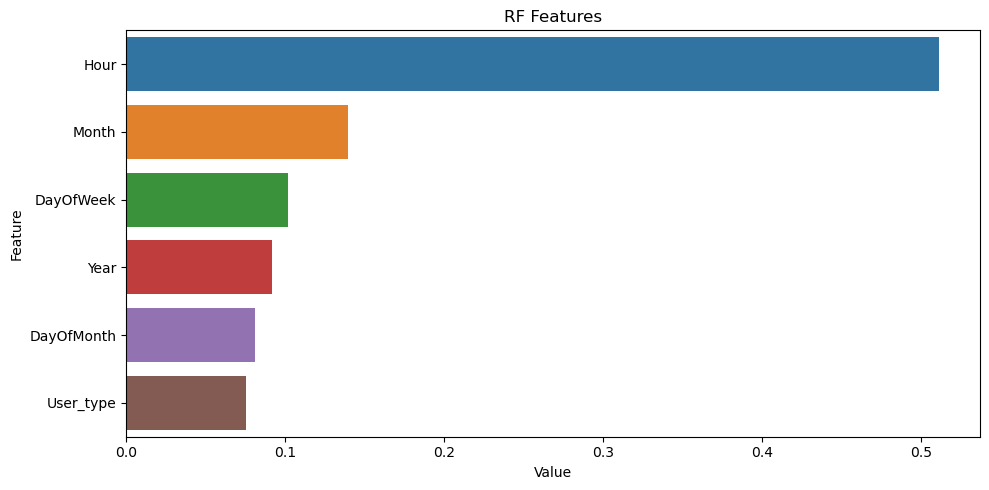

In [66]:
feature_imp = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('RF Features')
plt.tight_layout()
plt.show()